## Diabetes Prediction Using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv(r"E:\Diabetes Prediction\Files\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Checking for Missing Values')

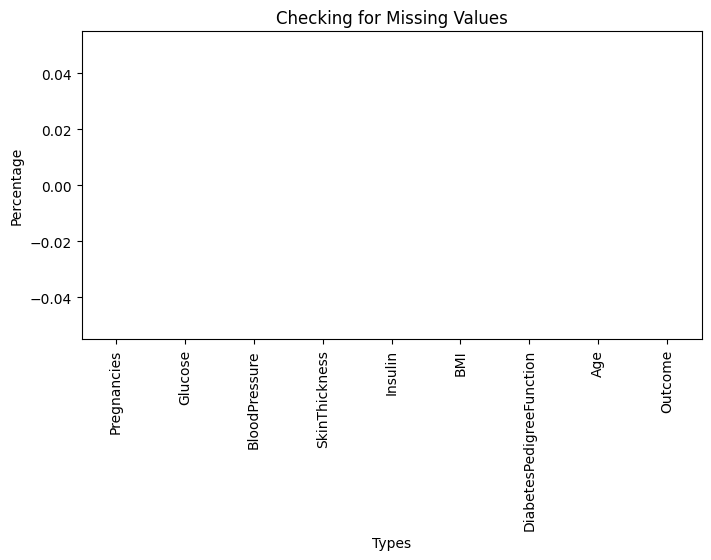

In [ ]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Handling Missing values

In [ ]:
# Columns where 0 is not a valid value
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check how many zero values are present
(df[cols_with_zero] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
# Replacing Invalid Zeros with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

Text(0.5, 1.0, 'Checking for Missing Values')

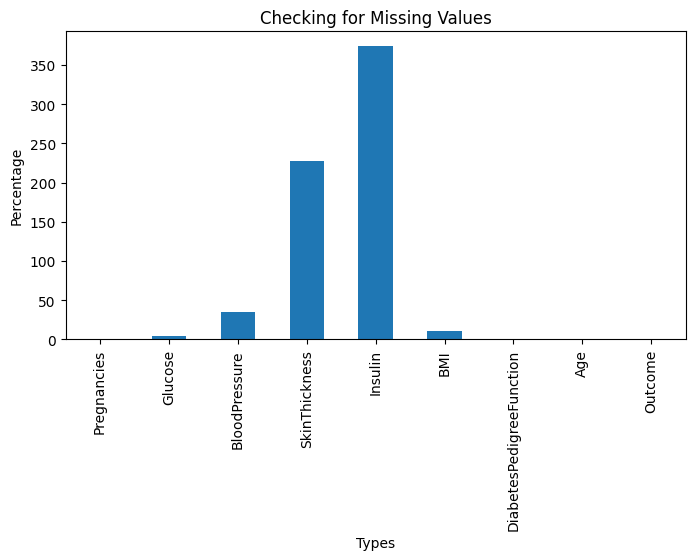

In [ ]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [ ]:
# Handle Missing Values (Median Imputation)
df.fillna(df.median(), inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Checking for Missing Values')

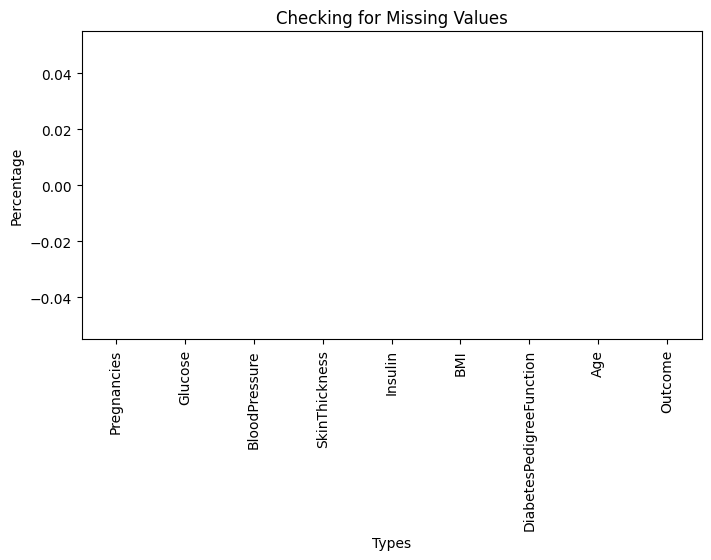

In [ ]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [ ]:
# Separating Features and Target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train, Test, Valid Phase

In [ ]:
# 70% Training, 30% Temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into 20% Test, 10% Validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

In [ ]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_val   = scaler.transform(X_val)

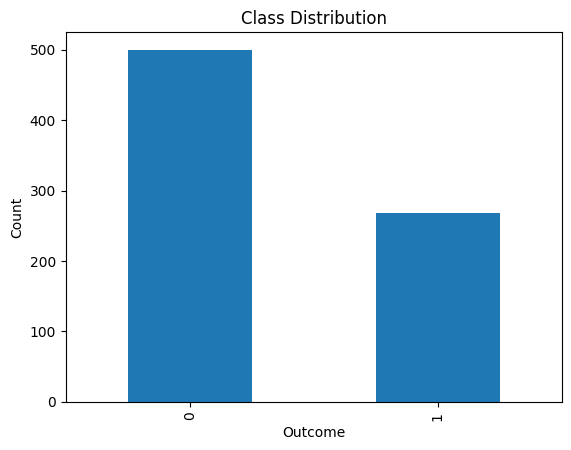

In [ ]:
# Class Distribution Check
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [ ]:
# ============================
# MODEL 1: Random Forest Classifier
# ============================

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred  = rf.predict(X_test)
rf_val_pred   = rf.predict(X_val)

# Accuracy
train_acc = accuracy_score(y_train, rf_train_pred)
test_acc  = accuracy_score(y_test, rf_test_pred)
val_acc   = accuracy_score(y_val, rf_val_pred)

print("Random Forest Accuracy")
print("Train:", train_acc)
print("Test :", test_acc)
print("Val  :", val_acc)

# Classification Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, rf_test_pred))

# Confusion Matrix
print("Confusion Matrix (Random Forest):\n")
print(confusion_matrix(y_test, rf_test_pred))


Random Forest Accuracy
Train: 0.957169459962756
Test : 0.7337662337662337
Val  : 0.7402597402597403

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix (Random Forest):

[[83 17]
 [24 30]]


In [ ]:
# ============================
# MODEL 2: XGBoost
# ============================

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=30,       # epochs ≈ number of trees
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Predictions
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred  = xgb.predict(X_test)
xgb_val_pred   = xgb.predict(X_val)

# Accuracy scores
train_acc = accuracy_score(y_train, xgb_train_pred)
test_acc  = accuracy_score(y_test, xgb_test_pred)
val_acc   = accuracy_score(y_val, xgb_val_pred)

print("XGBoost Accuracy")
print("Train:", train_acc)
print("Test :", test_acc)
print("Val  :", val_acc)

# Classification Report
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test, xgb_test_pred))

# Confusion Matrix
print("Confusion Matrix (XGBoost):\n")
print(confusion_matrix(y_test, xgb_test_pred))


XGBoost Accuracy
Train: 0.8752327746741154
Test : 0.7662337662337663
Val  : 0.7532467532467533

Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix (XGBoost):

[[87 13]
 [23 31]]


In [ ]:
# ============================
# MODEL 3: Artificial Neural Network
# ============================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model definition
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    X_train, y_train,
    epochs=25,              # 20–30 epochs
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluation on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("ANN Test Accuracy:", test_acc)

# 🔹 Predictions (probabilities → binary)
ann_probs = model.predict(X_test)
ann_preds = (ann_probs > 0.5).astype(int)

# 🔹 Accuracy (sklearn style)
ann_acc = accuracy_score(y_test, ann_preds)
print("ANN Accuracy (Sklearn):", ann_acc)

# 🔹 Classification Report
print("\nClassification Report (ANN):\n")
print(classification_report(y_test, ann_preds))

# 🔹 Confusion Matrix
print("Confusion Matrix (ANN):\n")
print(confusion_matrix(y_test, ann_preds))


Epoch 1/25
34/34 [==============================] - 1s 5ms/step - loss: 0.7236 - accuracy: 0.4246 - val_loss: 0.7132 - val_accuracy: 0.5584
Epoch 2/25
34/34 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6294 - val_loss: 0.6670 - val_accuracy: 0.6623
Epoch 3/25
34/34 [==============================] - 0s 1ms/step - loss: 0.6432 - accuracy: 0.6816 - val_loss: 0.6229 - val_accuracy: 0.7143
Epoch 4/25
34/34 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7225 - val_loss: 0.5809 - val_accuracy: 0.7143
Epoch 5/25
34/34 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7598 - val_loss: 0.5389 - val_accuracy: 0.7273
Epoch 6/25
34/34 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7709 - val_loss: 0.5061 - val_accuracy: 0.7662
Epoch 7/25
34/34 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7654 - val_loss: 0.4830 - val_accuracy: 0.7662
Epoch 8/25
34/34 [==

In [ ]:
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))
print("XGBoost Test Accuracy:", accuracy_score(y_test, xgb_test_pred))
print("ANN Test Accuracy:", ann_acc)


Random Forest Test Accuracy: 0.7337662337662337
XGBoost Test Accuracy: 0.7662337662337663
ANN Test Accuracy: 0.7272727272727273


# Accuracy Comparison Bar Chart (All 3 Models)

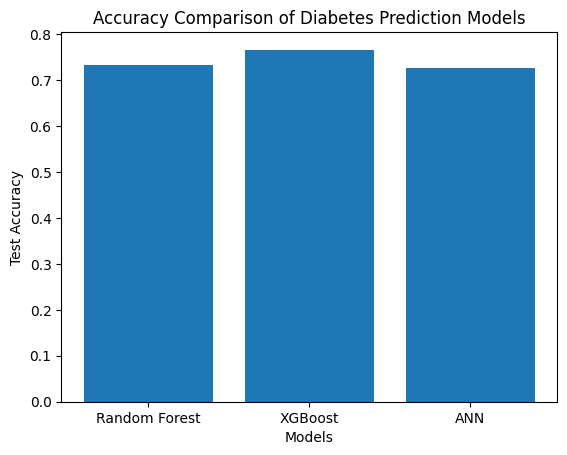

In [ ]:
import matplotlib.pyplot as plt

# Collect test accuracies
model_names = ['Random Forest', 'XGBoost', 'ANN']
test_accuracies = [
    accuracy_score(y_test, rf_test_pred),
    accuracy_score(y_test, xgb_test_pred),
    ann_acc
]

# Plot bar chart
plt.figure()
plt.bar(model_names, test_accuracies)
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Accuracy Comparison of Diabetes Prediction Models")
plt.show()


# Confusion Matrix – All 3 Models

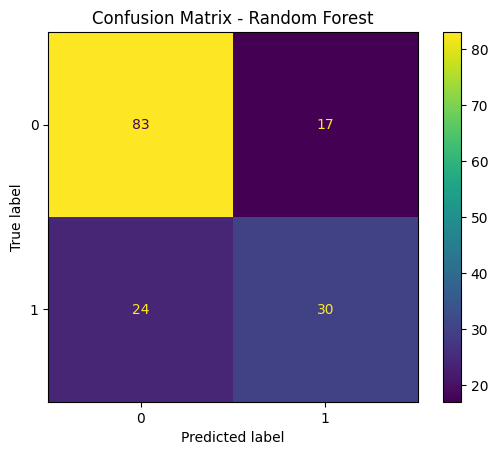

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_test_pred))
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

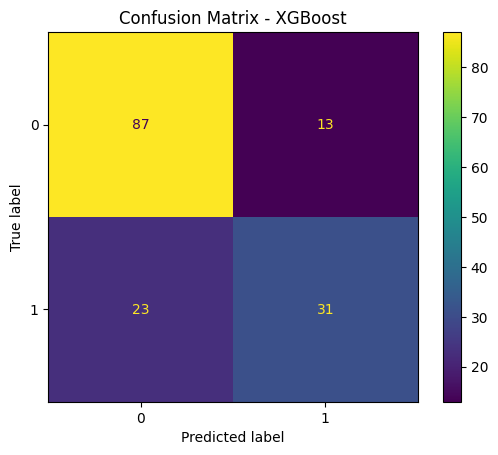

In [ ]:
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_test_pred))
disp_xgb.plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

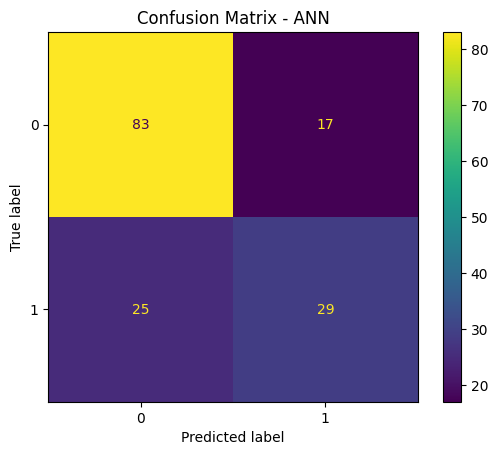

In [ ]:
disp_ann = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, ann_preds))
disp_ann.plot()
plt.title("Confusion Matrix - ANN")
plt.show()